In [15]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

In [16]:
df = pd.read_csv("carz.csv")

In [17]:
df.head()

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,4/18/2019,4/26/2019,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,6-Feb
1,1026101993,140,1.121444e+09,1/24/2019,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,6-Mar
2,1032382575,11,1.539893e+09,8/28/2018,9/4/2018,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,16-Jan
3,103627606,9,7.341951e+08,7/17/2018,8/1/2018,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,18-Feb
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,15-Jan


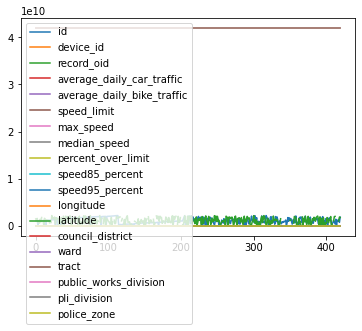

In [18]:
df.plot()

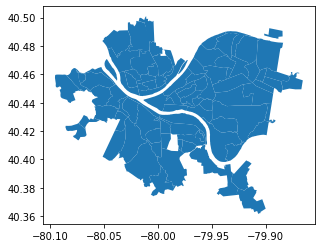

In [19]:
neigh = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neigh.plot()

In [21]:
num_cars = df.groupby("neighborhood").sum()['average_daily_car_traffic']
num_cars.sort_values(ascending=False)

neighborhood
Squirrel Hill South    79302.0
Shadyside              66132.0
East Liberty           51247.0
Mount Washington       47336.0
Bloomfield             43101.0
                        ...   
Upper Lawrenceville        0.0
Banksville                 0.0
South Oakland              0.0
Crawford-Roberts           0.0
Middle Hill                0.0
Name: average_daily_car_traffic, Length: 74, dtype: float64

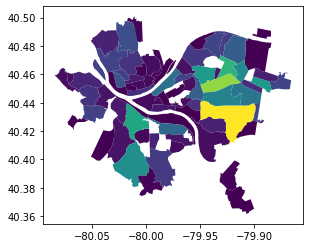

In [25]:
car_map = neigh.merge(num_cars, how='left', left_on='hood', right_on='neighborhood')
car_map[['hood','average_daily_car_traffic','geometry']].head()
car_map.plot(column='average_daily_car_traffic')